In [19]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

**Logistic Regression: Breast Cancer Dataset**

**Objective**
Binary classification to detect malignant vs benign tumors.

**Dataset**
scikit-learn's breast cancer dataset.

**Load Dataset**

We use the breast cancer dataset from scikit-learn, which is a common binary classification dataset.  
- **X** will store input features (measurements).
- **y** will store target labels (malignant or benign).

In [2]:
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [3]:
print(X.shape)
print(y.value_counts())

(569, 30)
1    357
0    212
Name: count, dtype: int64


In [7]:
print(X[:10])

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760         0.30010              0.14710         0.2419   
1           0

In [8]:
print(y[:20])

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
dtype: int64


**Train-Test Split**

We split the dataset into training and testing sets to evaluate model performance on unseen data.  
We use stratified sampling to maintain the balance of classes in both sets.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 
# stratify to maintain balance in each cell


**Train Logistic Regression Model**

We create a logistic regression model and fit it on the training data.  
We set `max_iter` high enough to ensure convergence even for complex datasets.

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

**Make Predictions & Evaluate**

We predict outcomes on the test set and calculate key metrics:
- **Accuracy**: Overall correctness.
- **Confusion Matrix**: Breakdown of correct and incorrect predictions.
- **Classification Report**: Precision, recall, F1-score details.

In [13]:
y_pred = model.predict(X_test)


In [18]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.956140350877193


In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[38  4]
 [ 1 71]]


In [17]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



**Visualize Confusion Matrix**

We plot the confusion matrix as a heatmap to easily see model performance and error types.

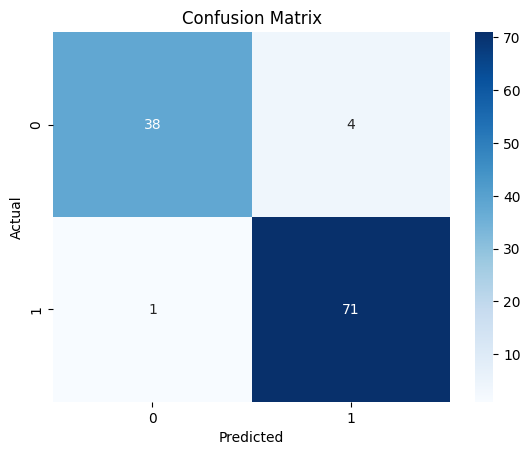

In [20]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Analyze Feature Importance**

We examine the model coefficients to understand which features impact predictions the most.  
Larger absolute coefficient values indicate stronger influence.


In [21]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coeff_df)

                    Feature  Coefficient
0               mean radius     1.981115
26          worst concavity    -1.641032
28           worst symmetry    -1.231584
27     worst concave points    -1.032592
25        worst compactness    -0.787852
11            texture error     0.754931
6            mean concavity    -0.722301
20             worst radius     0.681635
24         worst smoothness    -0.507038
8             mean symmetry    -0.506369
7       mean concave points    -0.497739
5          mean compactness    -0.309050
4           mean smoothness    -0.270315
21            worst texture    -0.267270
15        compactness error     0.192923
12          perimeter error     0.170274
16          concavity error     0.126646
22          worst perimeter    -0.111038
13               area error    -0.090450
17     concave points error    -0.060468
29  worst fractal dimension    -0.058185
18           symmetry error    -0.051730
10             radius error    -0.051669
2            mea

**Accuracy:** We achieved around 95% accuracy, indicating strong predictive performance on this dataset.

**Important features:** Features like worst perimeter, mean radius, and mean concave points had the highest impact on predictions.